# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st

# Import API key
from api_key import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Building weather_url
url ="http://api.openweathermap.org/data/2.5/weather?"
units="metrics"

# base_url = "http://api.openweathermap.org/data/2.5/weather"
# units = "imperial"
# Concatinating weather_url_query

query_url=(f"{url}appid={weather_api_key}&units={units}&q=")
query_url

# weather_url_query = (f"{base_url}appid={weather_api_key}&units={units}&q=")
# weather_url_query

# Print statements to begin API retrieval 
#print("Beginning of Data Retrieval")
#print("---------------------------")
#print is working

# Creating empty lists to populate when calling weather_api
city_list = []
cloudiness = []
country = []
date = []
humidity = []
latitude =[]
longitude =[]
max_temp = []
wind_speed = []

#record = 1

# For loop to call the API
for city in cities: 
    try: 
# requesting from API to search each city in the list cities
        response = requests.get(query_url + city).json()
#         response
#         print(json.dumps(response, indent=4,sort_keys= True))
#       Appending information to empty lists as calls are concluded
        city_list.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"] ["speed"])
#         #city_record = response["name"]
#         #print(f"Processing {record} | {city_record}")
#         #print(f"{weahter_url_query}&q={city}")
#         #record = record+1
        time.sleep (1.01)
        print(city)
    except KeyError: 
        print("City not found ...")
    continue
        
    

tiksi
City not found ...
lasa
avarua
waipawa
bathsheba
vanimo
dikson
kapaa
ribeira grande
bambous virieux
biak
high level
hovd
hithadhoo
rakitnoye
namatanai
allanridge
lompoc
saskylakh
port elizabeth
qaanaaq
punta arenas
valdivia
colomi
rikitea
norman wells
hobart
georgetown
hailar
sakaiminato
huarmey
saldanha
albany
City not found ...
solnechnyy
batagay
City not found ...
ushuaia
mackenzie
rundu
chuy
talara
fort nelson
tura
san quintin
vaini
bredasdorp
novikovo
belmopan
lokosovo
mildura
luganville
City not found ...
muroto
stephenville
luena
nanortalik
vestmanna
berlevag
atuona
linhares
east london
roald
nizwa
hermanus
jizan
umea
City not found ...
bonavista
bay city
port hardy
grindavik
tautira
sitka
severo-yeniseyskiy
tirthahalli
yeniseysk
busselton
beringovskiy
new norfolk
matay
marsa matruh
mar del plata
la primavera
kodiak
aksarka
portland
kavieng
katsuura
saint-philippe
ballina
filadelfia
mbandaka
adre
aracuai
mataura
tuktoyaktuk
touros
narsaq
humboldt
samarai
lucea
abha
bluff
c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {"City": city,
               "Cloudiness": cloudiness,
               "Country": country,
               "Date": date,
               "Humidity": humidity,
               "Latitude": latitude, 
               "Longitude": longitude, 
               "Max Temp": max_temp, 
               "Wind Speed": wind_speed}

weather_df = pd.DataFrame(weather_dict)

weather_df.count()

City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Latitude      571
Longitude     571
Max Temp      571
Wind Speed    571
dtype: int64

In [5]:
weather_df.to_csv("../output_data/cities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity under 100%.
humidity_under_100_df=weather_df.loc[weather_df["Humidity"]<=100]
humidity_under_100_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,broome,100,RU,1597018983,81,71.69,128.87,277.63,4.27
1,broome,12,IT,1597018984,100,46.62,10.70,291.48,1.00
2,broome,85,CK,1597018985,78,-21.21,-159.78,298.15,3.60
3,broome,0,NZ,1597018986,58,-41.41,175.52,288.15,8.70
4,broome,75,BB,1597018987,78,13.22,-59.52,301.15,6.20
...,...,...,...,...,...,...,...,...,...
566,broome,75,CL,1597019619,71,-36.72,-73.12,283.15,5.10
567,broome,70,RU,1597019620,93,54.67,20.13,292.59,3.00
568,broome,20,IL,1597019564,73,32.08,34.78,298.15,3.60
569,broome,0,RU,1597019622,80,51.32,42.77,287.59,0.89


In [7]:
#  Get the indices of cities that have humidity over 100%.
city_humidity_over_100=weather_df.loc[weather_df["Humidity"]>100].index
city_humidity_over_100

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
humidity_outliers=weather_df["Humidity"]
humidity_outliers
quartiles= humidity_outliers.quantile([.25,.5,.75])
lowerquartile=quartiles[0.25]
upperquartile=quartiles[0.75]
iqr=upperquartile-lowerquartile
humidity_lower_bound=lowerquartile - (1.5*iqr)
humidity_upper_bound=upperquartile + (1.5*iqr)
print(f"{humidity_lower_bound} and {humidity_upper_bound} are the outliers")

outliers_index=weather_df.loc[(weather_df["Humidity"]<humidity_lower_bound) & (weather_df["Humidity"]>humidity_upper_bound)].index
outliers_index



city_humidity_data = weather_df.drop(outliers_index, inplace=False)
clean_city_data=city_humidity_data.sort_values("Humidity", ascending=False)
clean_city_data

27.0 and 123.0 are the outliers


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
409,broome,98,GB,1597019444,100,58.97,-3.30,285.37,4.60
341,broome,8,AU,1597019364,100,-37.83,140.77,280.15,2.10
563,broome,90,AU,1597019616,100,-31.95,141.43,280.15,3.10
135,broome,75,LK,1597019135,100,6.80,81.48,298.15,1.00
268,broome,75,JP,1597019284,100,43.32,145.57,292.15,1.50
...,...,...,...,...,...,...,...,...,...
173,broome,15,ML,1597019179,13,20.20,1.01,307.31,4.06
522,broome,0,ML,1597019570,13,22.68,-3.98,310.32,2.16
476,broome,40,US,1597019450,12,37.47,-105.87,300.15,5.10
278,broome,1,US,1597019136,9,41.53,-109.47,303.15,10.80


In [11]:
# Extract relevant fields from the data frame
city_weather_df=clean_city_data[["Latitude","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_weather_df

# Export the City_Data into a csv
city_weather_df.to_csv("../output_data/City_Weather_Data.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

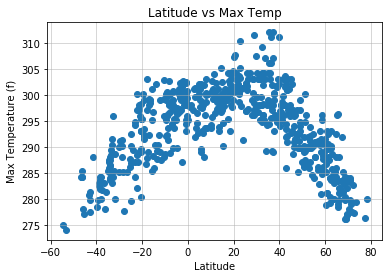

In [12]:
plt.scatter(city_weather_df["Latitude"],city_weather_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (f)")
plt.title("Latitude vs Max Temp")

#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Max Temp.png")

plt.show()

## Latitude vs. Humidity Plot

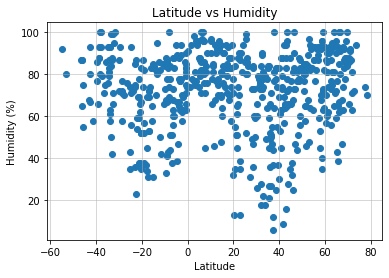

In [13]:
plt.scatter(city_weather_df["Latitude"],city_weather_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity")
#Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#Save the plotted figure as .pngs
plt.savefig("../Images/Latitude vs Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

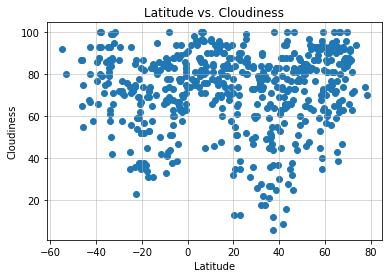

In [14]:
plt.scatter(city_weather_df["Latitude"],city_weather_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")

plt.grid(linestyle="-", linewidth = 1, alpha = 0.5)
plt.savefig("../Images/Latitude vs Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

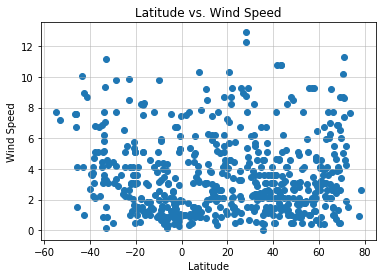

In [15]:
plt.scatter(city_weather_df["Latitude"],city_weather_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")

plt.grid(linestyle="-", linewidth = 1, alpha = 0.5)
plt.savefig("../Images/Latitude vs Windspeed.png")

plt.show()

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots
northern_hemisphere=city_weather_df.loc[city_weather_df["Latitude"]>=0]
northern_hemisphere

,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed
409,58.97,285.37,100,98,4.60
135,6.80,298.15,100,75,1.00
268,43.32,292.15,100,75,1.50
267,69.49,284.15,100,90,6.00
394,37.57,299.15,100,90,2.61
...,...,...,...,...,...
173,20.20,307.31,13,15,4.06
522,22.68,310.32,13,0,2.16
476,37.47,300.15,12,40,5.10
278,41.53,303.15,9,1,10.80


In [21]:
southern_hemisphere=city_weather_df.loc[city_weather_df["Latitude"]<=0]
southern_hemisphere

,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed
341,-37.83,280.15,100,8,2.10
563,-31.95,280.15,100,90,3.10
108,-38.18,284.26,100,40,3.10
544,-8.19,298.15,100,20,1.50
73,-33.65,284.26,99,36,7.04
...,...,...,...,...,...
37,-17.93,287.84,34,2,2.02
491,-9.66,292.14,33,2,2.58
23,-17.35,289.15,31,20,1.50
447,-15.23,296.85,31,0,1.06


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

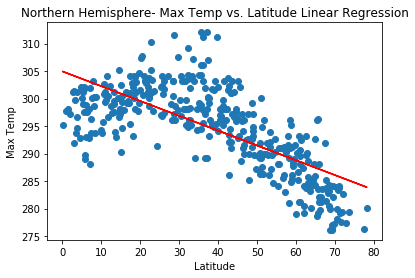

In [22]:
st.linregress(northern_hemisphere["Latitude"],northern_hemisphere["Max Temp"])

x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Northern Hemisphere- Max Temp vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere (Max Temp vs. Latitude Linear Regression).png")
%matplotlib inline

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

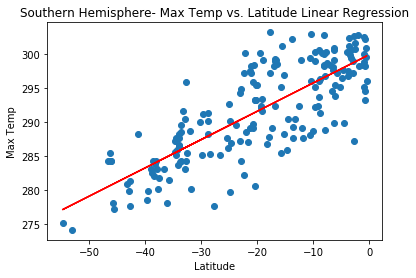

In [23]:
st.linregress(southern_hemisphere["Latitude"],southern_hemisphere["Max Temp"])

x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Southern Hemisphere- Max Temp vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Southern Hemisphere (Max Temp vs. Latitude Linear Regression).png")
%matplotlib inline

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

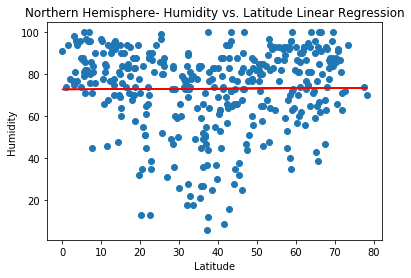

In [24]:
st.linregress(northern_hemisphere["Latitude"],northern_hemisphere["Humidity"])

x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere- Humidity vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere (Humidity vs. Latitude Linear Regression).png")
%matplotlib inline

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

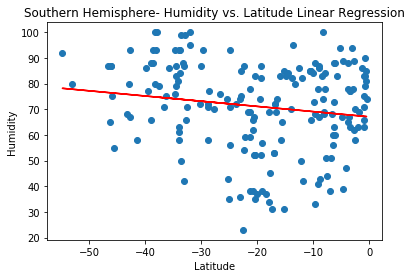

In [25]:
st.linregress(southern_hemisphere["Latitude"],southern_hemisphere["Humidity"])

x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere- Humidity vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Southern Hemisphere (Humidity vs. Latitude Linear Regression).png")
%matplotlib inline

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

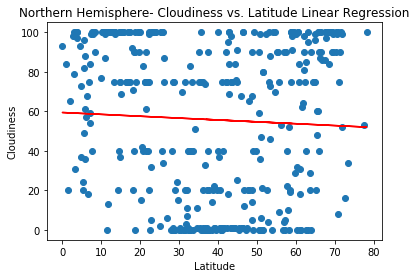

In [26]:
st.linregress(northern_hemisphere["Latitude"],northern_hemisphere["Cloudiness"])

x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere- Cloudiness vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere (Cloudiness vs. Latitude Linear Regression).png")
%matplotlib inline

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

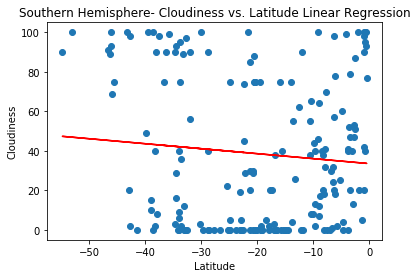

In [27]:
st.linregress(southern_hemisphere["Latitude"],southern_hemisphere["Cloudiness"])

x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere- Cloudiness vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Southern Hemisphere (Cloudiness vs. Latitude Linear Regression).png")
%matplotlib inline

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

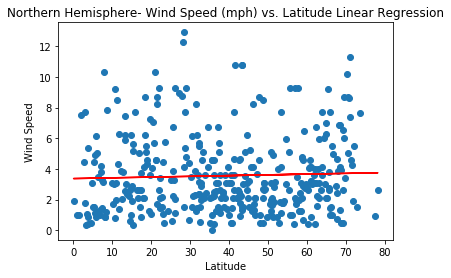

In [28]:
st.linregress(northern_hemisphere["Latitude"],northern_hemisphere["Wind Speed"])

x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere- Wind Speed (mph) vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Northern Hemisphere (Wind Speed (mph) vs. Latitude Linear Regression).png")
%matplotlib inline

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

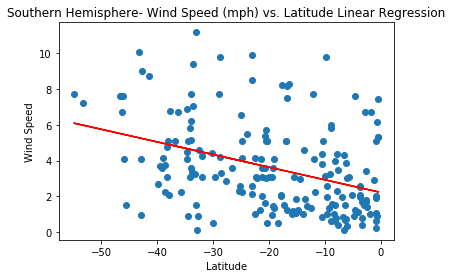

In [29]:
st.linregress(southern_hemisphere["Latitude"],southern_hemisphere["Wind Speed"])

x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere- Wind Speed (mph) vs. Latitude Linear Regression")
plt.show()
plt.savefig("../Images/Southern Hemisphere (Wind Speed (mph) vs. Latitude Linear Regression).png")
%matplotlib inline